In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
train = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/titanic/test.csv', index_col='PassengerId')

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

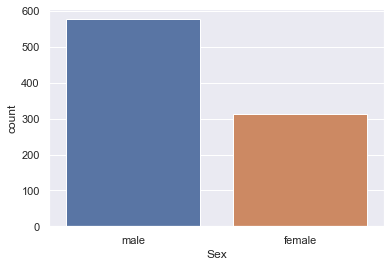

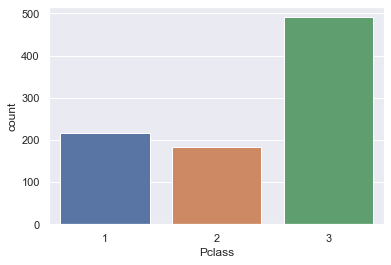

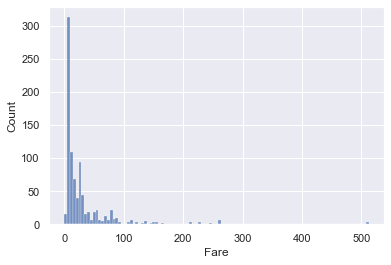

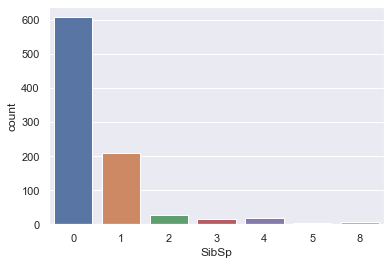

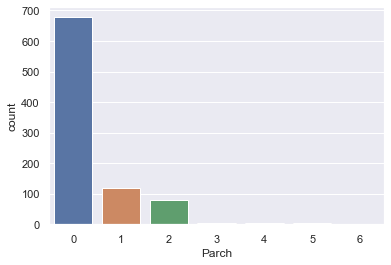

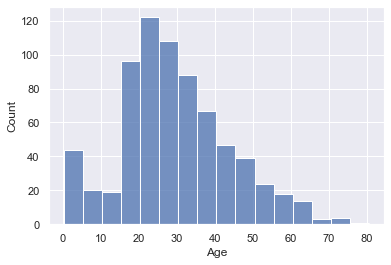

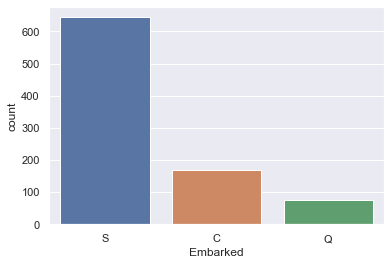

In [8]:
sns.countplot(data=train, x='Sex')
plt.show()
sns.countplot(data=train, x='Pclass')
plt.show()
sns.histplot(data=train, x='Fare')
plt.show()
sns.countplot(data=train, x='SibSp')
plt.show()
sns.countplot(data=train, x='Parch')
plt.show()
sns.histplot(data=train, x='Age', binwidth=5)
plt.show()
sns.countplot(data=train, x='Embarked')
plt.show()

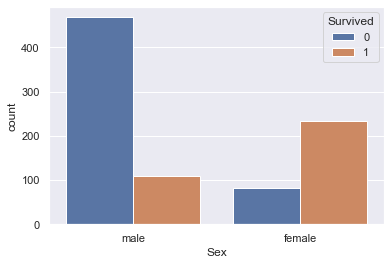

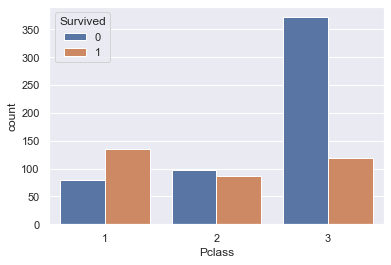

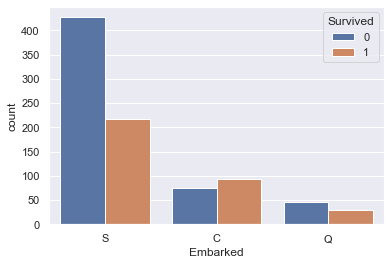

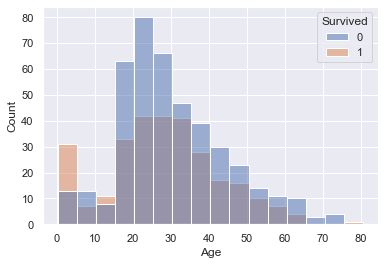

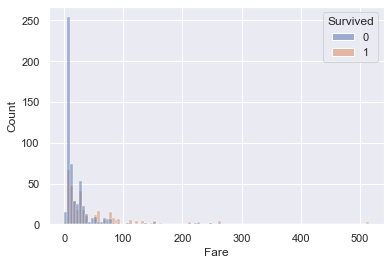

In [9]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.show()
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.show()
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.show()
sns.histplot(data=train, x='Age', hue='Survived', binwidth=5)
plt.show()
sns.histplot(data=train, x='Fare', hue='Survived', binwidth=5)
plt.show()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


<AxesSubplot:ylabel='PassengerId'>

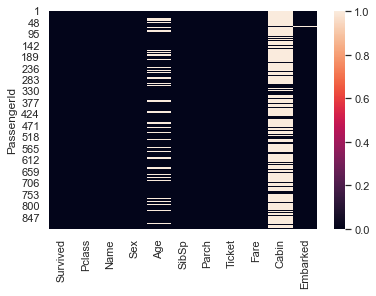

In [11]:
sns.heatmap(train.isnull())

In [12]:
missing = ['Age', 'Cabin', 'Embarked']
(train.loc[:,missing].isnull().sum() / train.shape[0]) *100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [16]:
train_new = train.copy()
train_new = train_new.drop('Cabin', axis=1)
train_new['Embarked'] = train_new['Embarked'].fillna('S')

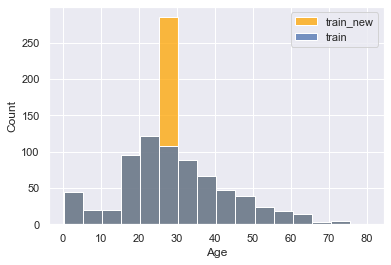

In [17]:
train_new['Age'] = train_new['Age'].fillna(train_new['Age'].median())

sns.histplot(data=train_new, x='Age', binwidth=5, color='Orange', label='train_new')
sns.histplot(data=train, x='Age', binwidth=5, label='train')
plt.legend()

In [18]:
train_new['Family'] = train_new['SibSp'] + train_new['Parch']
train_new = train_new.drop(['SibSp', 'Parch'], axis=1)

In [19]:
to_encode = ['Name', 'Sex', 'Ticket', 'Embarked']

for feat in to_encode:
    le = LabelEncoder()
    train_new[feat] = le.fit_transform(train_new[feat])

<AxesSubplot:>

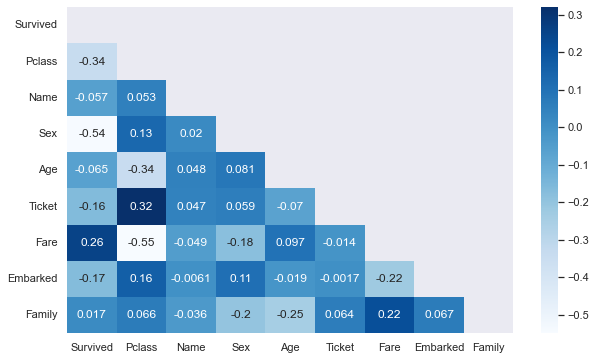

In [20]:
triu_mask = np.triu(train_new.corr())
plt.figure(figsize=(10,6))
sns.heatmap(train_new.corr(), annot=True, mask=triu_mask, cmap='Blues')

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [22]:
test_new = test.copy()

# missing values
test_new = test_new.drop('Cabin', axis=1)
test_new['Fare'] = test_new['Fare'].fillna(test_new['Age'].median())
test_new['Age'] = test_new['Age'].fillna(test_new['Age'].median())

# feature engineering
test_new['Family'] = test_new['SibSp'] + test_new['Parch']
test_new = test_new.drop(['SibSp', 'Parch'], axis=1)

# label encoding
to_encode = ['Name', 'Sex', 'Ticket', 'Embarked']

for feat in to_encode:
    le = LabelEncoder()
    test_new[feat] = le.fit_transform(test_new[feat])

In [23]:
y = train_new.pop('Survived')

lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(train_new, y)
predicted = lr.predict(test_new)

# model coefficients
coefs = np.ravel(lr.coef_)
intercept = lr.intercept_

<AxesSubplot:>

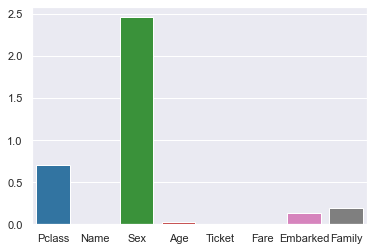

In [24]:
sns.barplot(x=train_new.columns, y=np.abs(coefs), palette='tab10')

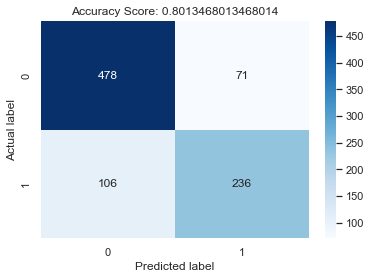

In [25]:
lr_confusion = LogisticRegression(solver='liblinear', random_state=0)
lr_confusion.fit(train_new,y)
y_logistic = lr.predict(train_new)
cm = confusion_matrix(y, y_logistic)

sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(train_new, y))
plt.title(all_sample_title, size = 12);